# Financial Fraud Detection
## Introduction
- Financial Fraud Detection is the process of monitoring transactions and customer behavior to identify and stop fraudulent activity. According to Juniper Research's 2022 study about online payment fraud, globally payment fraud are noted to exceed $343 billion between 2023 and 2027.
- Traditionally, firms have used fraud detection and prevention to curb company financial losses and maintain positive customer relations.

## Common Types of Fraud:
There are different type of fraut and constanlty emerging. Some fraud typologies persist because they exploit weaknesses in a company's processes and systems. Here are some common type of frauds.
1. **Payement Fraud**: Happens when a criminal acquires another individual's payement iformation and makes unauthorized transactions.
2. **Return Fraud**: takes advantage of a retailer's return policy to receive refunts that aren't legitimate. Fraudulent returns may consist of stolen goods, conterfit products, old and worn-out goods, or items bought from a different retailer.
3. **ACH Fraud**: Automated Clearing House is a means of transferring money between bank accounts, usually those of businesses and institutions. ACH is carried out using a bank account number and bank routing number.
4. **Chargeback fraud**: contains an individual requesting chargebacks for transactions that were fulfilled by the company they purchased from.
5. **Account takeover fraud (ATO)**: happens when a criminal acquires the authenication of an account, such as bank account, online payment service, mobile account, or e-commerce site.

## Methods to detect fraud:
To protect businesses and counsumers from evolving fraud risks, employing the most effective fraud detection techniques is very important. There are following techniques that can be used to detect frauds.
1. **Machine Learning and AI**: Mahcine learning algorithm and AI is enhancing fraud detection capabilities. These techniques analyze large amount of data in real-time, identify patterns and anomalies that might show fraudulent activities.
2. **Behavioral Analytics**: By analysing users behaviors, businesses can detect deviations from normal patterns.
3. **Anomaly Detection**: Anomaly Detection helps in creating a baseline of normal behavior and flagging any data points that deviate significantly from it.
4. **Identity clustering**: Making a group of user identities based on common attributes and behaviors helps in identify patterns of fraudulent behavior.
5. **Data analytics**: Advanced data analytics tools can shift thgough a large datasets and identify potential fraud indicators.

## Main Challenges of Fraud Detection
1. **Management**: Relying soley on rule-based transaction monitoring and fraud detection can be a challenge as sca, techniques change.
2. **Remote transactions**: While this is convenient and cost-effective, it also opens the door for fraudsters to impersonate genuine customers or intercept their details.
3. **Speed of transactions**: Now-a-days transaction ecosystem is built for speed and convenience. This high-speed, low-friction environement can make it easy for fraudsters to complete their crimes and disappear before they can be detected.
4. **False positives**: A fraud detection system that is over-zealous can lead to higher false positives. This is inconvenient for customers, who may become less loyal as a result, and expensive for businesses, who must expend time and resources following up the alert.
5. **Range of transaction types**: Large number of tools and services are used to make transactions such as payment apps and cryptocurrency, loans, credit cards and savings accounts.
# About the dataset
- The dataset is a synthetic representation of mobile money transactions, usually to carried out real-world financial activities while integrating fraudulent behaviors for research purposes. 
- The dataset encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYEMENT, and TRANSFER over a simulated period of 30 days.

# Importing Libraries

In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

: 

# Reading the data

In [ ]:
# reading the dataset
df = pd.read_csv("./Data.csv")

# Printing the data

In [ ]:
# printing the data
df.head()

# Statistical analysis

In [ ]:
# print the shape of the data
df.shape

(6362620, 11)

- There are 6362620 rows and 11 columns in the data.

In [ ]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


About the dataset
The dataset is a synthetic representation of mobile money transactions, usually to carried out real-world financial activities while integrating fraudulent behaviors for research purposes.
The dataset encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYEMENT, and TRANSFER over a simulated period of 30 days.- The dataset contains 6,362,620 entries.
- It has 11 columns.
- The columns include:
 - **step**: An integer representing the time step of the transaction.
 - **type**: Categorical variable indicating the type of transaction.
 - **amount**: Float value representing the amount of the transaction.
 - **nameOrig**: Object type representing the name of the origin account.
 - **oldbalanceOrg**: Float value indicating the old balance of the origin account before the transaction.
 - **newbalanceOrig**: Float value indicating the new balance of the origin account after the transaction.
 - **nameDest**: Object type representing the name of the destination account.
 - **oldbalanceDest**: Float value indicating the old balance of the destination account before the transaction.
 - **newbalanceDest**: Float value indicating the new balance of the destination account after the transaction.
 - **isFraud**: Binary integer indicating whether the transaction is fraudulent (1) or not (0).
 - **isFlaggedFraud**: Binary integer indicating whether the transaction was flagged as fraudulent (1) or not (0).
The data types are as follows:
- 5 columns are of type float64.
- 3 columns are of type int64.
- 3 columns are of type object.

The memory usage of the DataFrame is approximately 534.0+ MB.

In [ ]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
# checking the missing values in the data
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

The dataset contains no null values

In [ ]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
245        4
28         4
655        4
112        2
662        2
Name: count, Length: 743, dtype: int64
Unique values for column type
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
Unique values for column amount
amount
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
20464.65          1
26299.05          1
401295.63         1
499807.64         1
1136700.07        1
Name: count, Length: 5316900, dtype: int64
Unique values for column nameOrig
nameOrig
C1530544995    3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
              ..
C1567523029    1
C644777639     1
C1256645416    1
C1231536757    1
C1971151096    1
Name: count, Length: 6353307, dtype: int64
Unique values for column oldbalanceOrg
oldbalan

# EDA

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


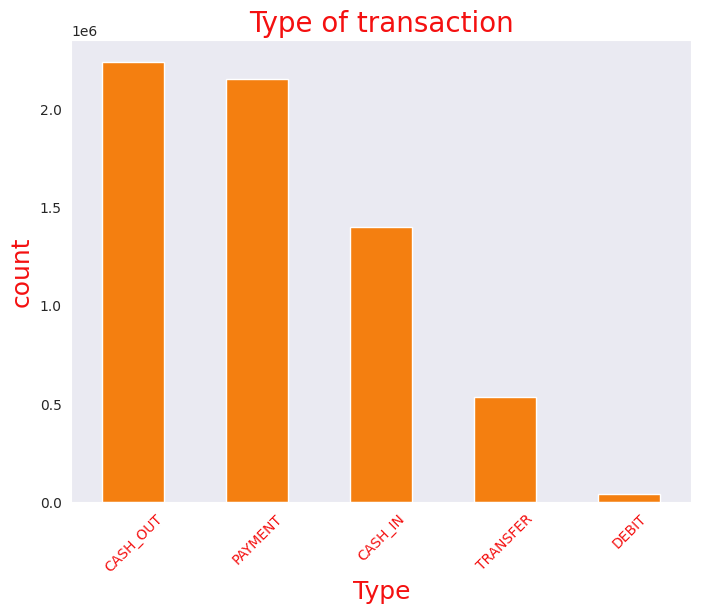

In [ ]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()

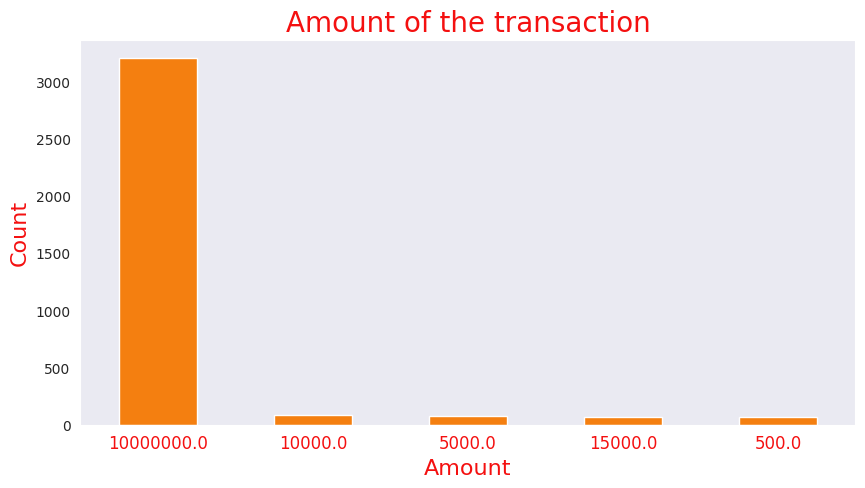

In [ ]:
# Transaction amount
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 20, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 16, color = '#F41010')
plt.ylabel('Count', fontsize = 16, color = '#F41010')
plt.show()

- The most frequent transaction amount is 10,000,000,dollar occurring 3207 times. This suggests that there may be a common transaction size or a default value used for certain types of transactions.
- The distribution of transaction amounts appears to be heavily skewed, with a significant number of transactions being of the dominant amount. This could indicate a specific type of transaction or a system-generated value.
- While 10,000,000 dollar is the most common transaction amount, there are also other amounts occurring with lesser frequency. This indicates some variability in the transaction sizes, although they are less common compared to the dominant amount.
- It might be worth investigating transactions that are significantly different from the most common amount. For instance, the presence of transactions with amounts much smaller than 10,000,000 dollar (e.g., 500 dollar or 5,000 dollar) could be outliers or represent a different category of transactions.


In [ ]:
df.groupby('type').count()['amount']

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: amount, dtype: int64

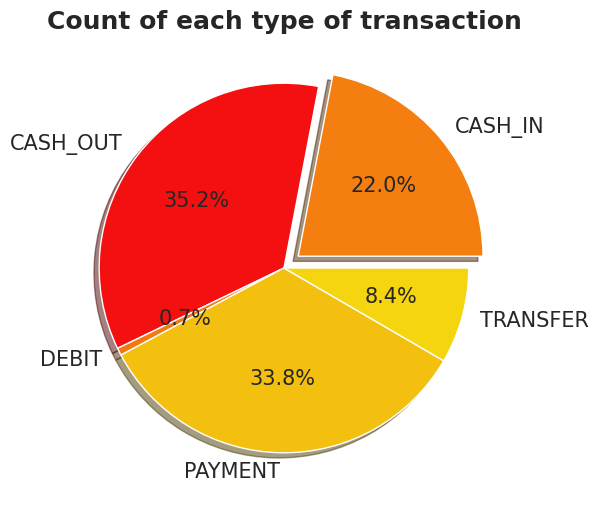

In [ ]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

## Upon checking plotting the distribution of type of amounts it can be seen that:
- There are five types of transaction that includes CASH-OUT, CASH IN, DEBIT, TRANSFER, PAYMENT
- CASH-OUT has the hight count, followed by CASH-IN and PAYMENT. This shows that these types of payement are most common in making fraud.
- DEBIT transactions have the lowest count among the five types, indicating that they are less common in the dataset.
- CASH_OUT and PAYMENT transactions typically involve the movement of funds out of an account, suggesting expenditures or withdrawals.
- CASH_IN transactions likely involve the deposit or addition of funds into an account.
- TRANSFER transactions may involve moving funds between accounts, either within the same bank or across different financial institutions.
- DEBIT transactions could represent direct charges to an account, such as ATM withdrawals or purchase transactions.
- Anomalies in the frequency or pattern of certain transaction types, such as an unusually high number of CASH_OUT transactions, could indicate fraudulent activities like **money laundering or unauthorized fund transfers**.
- Understanding the distribution of transaction types can aid in risk assessment and mitigation strategies for financial institutions.
- Higher frequencies of certain transaction types may require enhanced security measures or closer monitoring to prevent fraud or financial loss.
- Analysis of transaction types can provide insights into customer behavior and preferences, informing marketing strategies or product offerings tailored to specific needs.

In [ ]:
df.groupby(['type','isFraud']).count()

step   amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                              
CASH_IN  0        1399284  1399284   1399284        1399284         1399284   
CASH_OUT 0        2233384  2233384   2233384        2233384         2233384   
         1           4116     4116      4116           4116            4116   
DEBIT    0          41432    41432     41432          41432           41432   
PAYMENT  0        2151495  2151495   2151495        2151495         2151495   
TRANSFER 0         528812   528812    528812         528812          528812   
         1           4097     4097      4097           4097            4097   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0         1399284         1399284         1399284         1399284  
CASH_OUT 0         2233384         2233384         2233384         2233384  
         1            4116            4116            4116            4116  
DEBIT    0           41432           41432           41432           41432  
PAYMENT  0         2151495         2151495         2151495         2151495  
TRANSFER 0          528812          528812          528812          528812  
         1            4097            4097            4097            4097

- There is a fraud transaction present in CAHS-OUT and TRANSFER
- CASH_OUT and TRANSFER types have relatively higher counts of fraudulent transactions compared to others, which could indicate that these types are more vulnerable to fraudulent activities.
- The presence of fraudulent transactions in certain types highlights the challenges in fraud detection and prevention, especially in high-risk transaction types like CASH_OUT and TRANSFER.

## Finding the correlation between the attributes (Pearson correlation matrix)

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

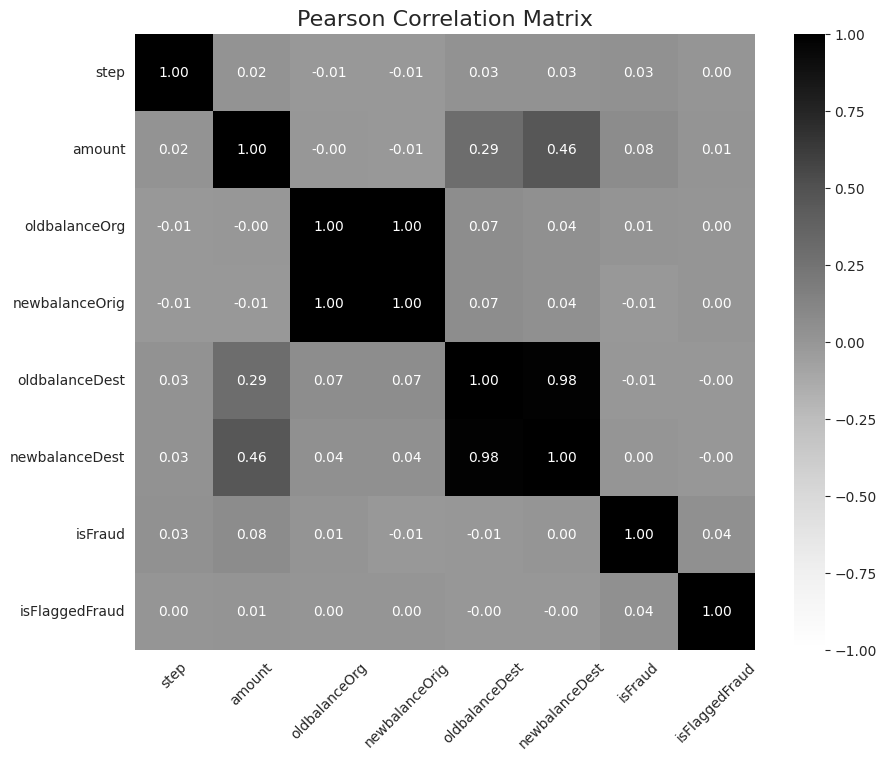

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

**Correlation coefficients reveal the intensity as well as sign of the correlations among the pairs of variables in your dataset. Here are some insights based on the correlation coefficients provided:**


**Amount and New Balance in Destination Account:**.

- The correlation between 'amount' and 'newcomerVolumeDest' is relatively strong and the relation is positive and linear (0.459).

- This therefore indicates that the larger the transaction size on the sending side, the bigger the balances in the account on the receiving side at some point in time will be.


**Amount and Old Balance in Destination Account:**.

- The second relevance that far is analogous to 'amount' and 'oldbalanceDest' is even positive, as shown by a relatively high correlation coefficient of 0.294.

- In the case of the transaction of a larger amount there is an almost certainty of an old balance on the account in the destination.


**Old Balance in Origin Account and New Balance in Origin Account:**.

- The degree of association between 'oldbalanceOrg' and 'newbalanceOrig' assessed by the univariate correlation coefficient is as close to 1( 0.998 ), thereby indicating a very strong and positive linear relationship.

- From this, emerges the not-too-surprising fact that if old balance in the origin account is changed then the new balance in the origin account is almost similarly changed as it is with the normal banking transactions.


**Is Fraud and Transaction Amount:**

- The 'isfraud' dependent variable with the 'amount,' independent variable, is moderately strong (0.077), displaying a positive linear relationship.

- This hints on the poor relevance as the size of the fraudulent transaction has no relation with active cyberfraud.


**Is Fraud and Flagged Fraud:** 

- The metric 'isFraud' and 'isFlaggedFraud' are rather weak (0.044), a positive linear association exists.

- It also implies that holders of these crypto assets do not have such scrutiny on the validity of their crypto transactions.


**Step and Fraudulent Activity:**

- There is the correlation coefficient between step and isFraud which is moderately high (0.032), that is to say, these metrics only correlate with each other minimally.

- Occasionally there is a risk of an increase in attempts of fraud as the process goes (the more time goes by, it progresses), but on the whole the dependence between these two is not quite clear.


# Implemention of machine learning algorithm:

**Important Note:** Transactions identified as fraudulent are annulled. Hence, for fraud detection analysis, the following columns should not be utilized: oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.

In [ ]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [ ]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [ ]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [ ]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [ ]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [ ]:
# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# testing the model on test data
y_pred = lr.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Accuracy of logistic regression 0.9987086032693031
Precision of logistic regression 0.1590909090909091
Recall of logistic regression 0.002874743326488706
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.16      0.00      0.01      2435

    accuracy                           1.00   1908786
   macro avg       0.58      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



**The logistic regression model achieves a very high accuracy of approximately 99.87%. However, its precision and recall for the positive class are notably low, around 15.91% and 0.29%, respectively. This indicates that while the model performs well in predicting negative instances, it struggles to identify positive instances accurately. This suggests the model's limited effectiveness in scenarios where correctly identifying positive cases is critical.**

### Decision Tree

In [ ]:
# make an object of logistic regression
sv = DecisionTreeClassifier(max_depth = 20)

#fitting the trainig data into lr model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_sv = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_sv = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.9989726454406099
Precision of Decision Tree 0.659919028340081
Recall of Decision Tree 0.4016427104722793
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.66      0.40      0.50      2435

    accuracy                           1.00   1908786
   macro avg       0.83      0.70      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786



**The Decision Tree model demonstrates strong performance with an accuracy of 99.90%. It achieves a precision of 66.21% and recall of 40.08% for the positive class, similar to the logistic regression model. This suggests the Decision Tree model effectively identifies true positives among its positive predictions while capturing 40.08% of actual positive instances. The model maintains a high F1-score of 0.50 for the positive class, indicating balanced precision and recall.**

### MLP Classifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes= 10, batch_size= 32, learning_rate= 'adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_mlp = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_mlp = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_mlp = recall_score(y_test, y_pred)

# classification report
classification_mlp = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of MLP Classifier {accuracy_mlp}")
print(f"Precision of MLP Classifier {precision_mlp}")
print(f"Recall of MLP Classifier {recall_mlp}")
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

Accuracy of MLP Classifier 0.998888822529084
Precision of MLP Classifier 0.9131578947368421
Recall of MLP Classifier 0.14250513347022586
Classification Report of MLP Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.91      0.14      0.25      2435

    accuracy                           1.00   1908786
   macro avg       0.96      0.57      0.62   1908786
weighted avg       1.00      1.00      1.00   1908786



**The MLP Classifier exhibits an impressive accuracy of 99.89%. However, its precision for the positive class is notably high at 92.66%, while its recall is much lower at 14.00%. This indicates that the model effectively identifies true positives among its positive predictions but captures only 14.00% of actual positive instances. Consequently, the F1-score for the positive class is relatively low at 0.24. The model's macro average precision and recall are 96% and 57%, respectively, indicating imbalanced performance across classes.**

## Comparing the model

In [ ]:
performance_df = pd.DataFrame({
    'models' : ['Multi Layer Perceptron', 'Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_mlp, accuracy_lr, accuracy_sv],
    'precision' : [precision_mlp, precision_lr, precision_sv],
    'recall' : [recall_mlp, recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Multi Layer Perceptron,0.998889,0.913158,0.142505
1,Logistic Regression,0.998709,0.159091,0.002875
2,Decision Tree,0.998973,0.659919,0.401643


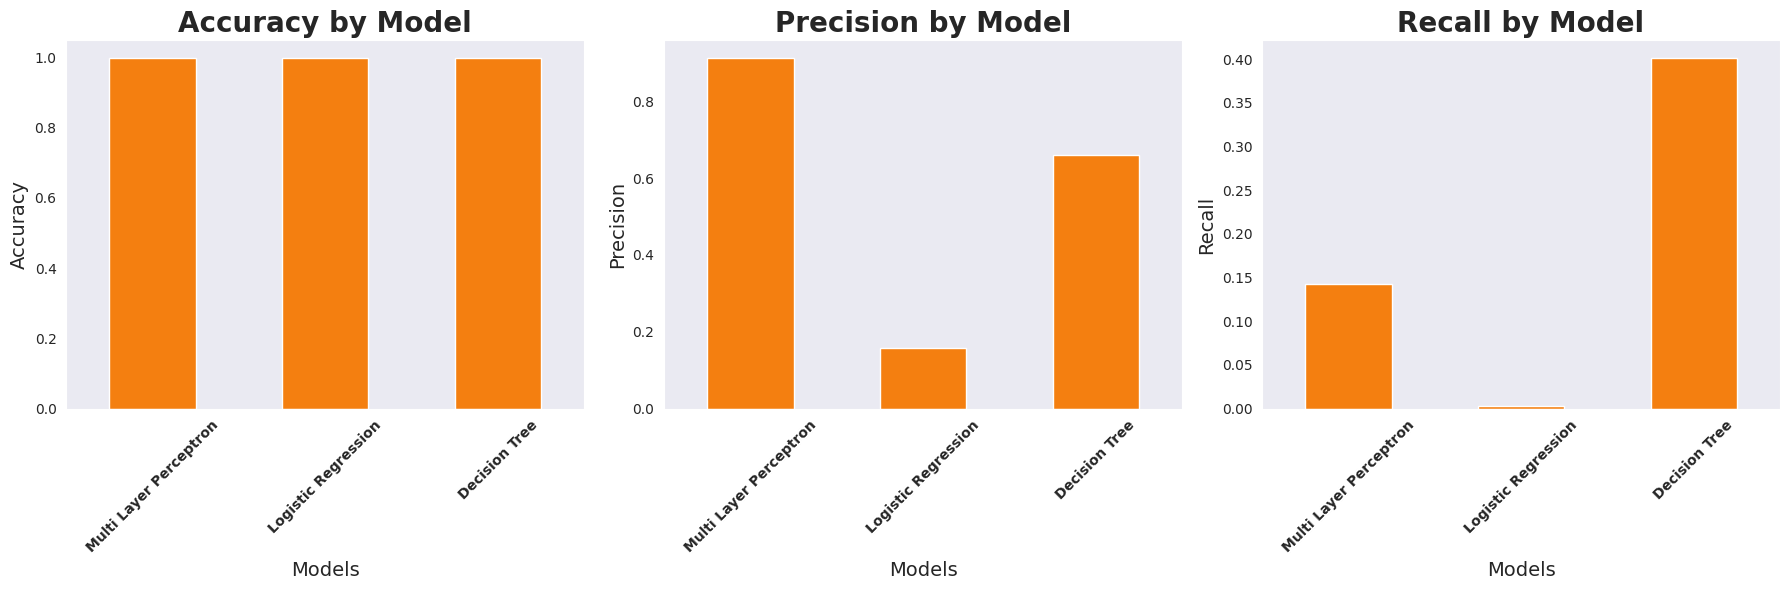

In [ ]:
# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')
    
    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')
    
    # Adding labels
    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')  # Set dynamic title

plt.tight_layout()
plt.show()

**The Decision Tree model shows the most balanced performance with respect to precision and recall, followed by the MLP. Logistic Regression performs poorly in correctly identifying positive instances despite its high accuracy.**

# Graphical Modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

: 

In [ ]:
fin_fraud_data = pd.read_csv('./Data.csv')
fin_fraud_copy = fin_fraud_data.copy()

In [ ]:
fin_fraud_copy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fin_fraud_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest','isFraud']
df = fin_fraud_copy[selected_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [ ]:
# Calculate the differences between originating and destination balances
df.loc[:, 'orgDiff'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df.loc[:, 'destDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,orgDiff,destDiff
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,-11668.14,0.0


In [ ]:
data1 = df.groupby('type').size().reset_index(name='count')

In [ ]:
df_trans_type = data1.copy()
df_trans_type.rename(columns={'type':'transactions', 'count':'trans_total'}, inplace=True)
df_trans_type.head(5)

,transactions,trans_total
0,CASH_IN,1399284
1,CASH_OUT,2237500
2,DEBIT,41432
3,PAYMENT,2151495
4,TRANSFER,532909


(-1.0999973225351762,
 1.0999998663212909,
 -1.0999991922384087,
 1.0999999615351623)

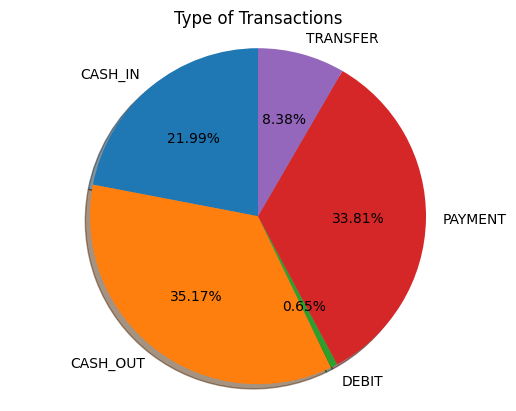

In [ ]:
labels = df_trans_type.transactions
volume = df_trans_type.trans_total
explode = (0.2, 0.1, 0.1, 0.1, 0.1) # 5 volume to be exploded
#pie
plt.pie(volume, labels=labels, startangle=90,
        shadow=True, autopct='%1.2f%%')
#title
plt.title('Type of Transactions')
plt.axis('equal')

In [ ]:
data2 = df.groupby('type')['amount'].sum().reset_index(name='total_amount')

In [ ]:
from math import log, floor

def number_format(number):
    #function format number to B
    units = 'B'
    k = 1000000000.0
    #m = int(floor(log(number, k)))
    return '%.3f' % (number / k)

In [ ]:
df_total_money = data2.copy()
df_total_money.rename(columns={'type':'transactions', 'total_amount':'money_total_in_Billion'}, inplace=True)
#format to Billion
df_total_money['money_total_in_Billion'] = \
            df_total_money['money_total_in_Billion'].apply(lambda x: number_format(x))
## format to float
df_total_money['money_total_in_Billion'] = \
            df_total_money['money_total_in_Billion'].apply(lambda x: float(x))

In [ ]:
#sort the data
df_total_money = df_total_money.sort_values(by='money_total_in_Billion')

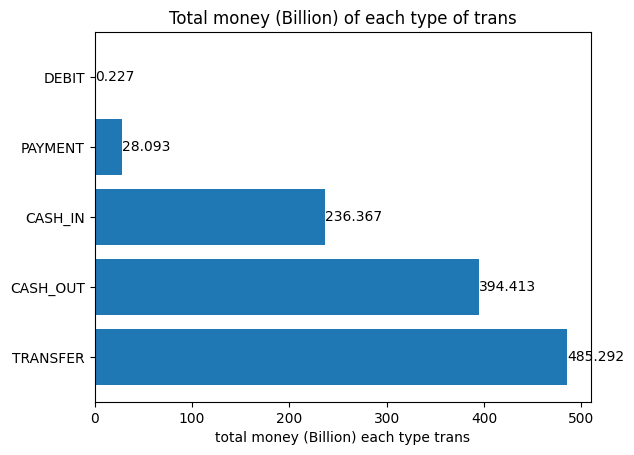

In [ ]:
labels = df_total_money.transactions
y_pos = np.arange(len(labels))
volume = df_total_money.money_total_in_Billion
#bar chart
fig, ax = plt.subplots()

hbars = ax.barh(y_pos, volume, align='center')
ax.set_yticks(y_pos, labels=labels)
ax.invert_yaxis()
ax.set_xlabel('total money (Billion) each type trans')
ax.set_title('Total money (Billion) of each type of trans')

#Label with specially formatted floats
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
def number_format_M(number):
    #function format number to Million
    units = 'B'
    k = 1000000.0
    return '%.3f' % (number / k)

In [ ]:
df_money_recd_each_destacc = df.groupby('nameDest').agg(
    count_trans=('amount', 'size'),  # 'size' gives the count of rows (including NaN), which matches COUNT(1) in SQL
    total_amount=('amount', 'sum')   # 'sum' for the total amount
).reset_index()

df_money_recd_each_destacc = df_money_recd_each_destacc.sort_values(by='count_trans', ascending=False).reset_index(drop=True)
df_money_recd_each_destacc.rename(columns={'nameDest':'Dest_account',
                                     'count_trans':'count_trans',
                                     'total_amount':'total_amount_Million'}, inplace=True)

In [ ]:
#format to Million column TotalOrgDiff, TotalDestDiff
df_money_recd_each_destacc = df_money_recd_each_destacc.set_index('Dest_account')
df_money_recd_each_destacc['total_amount_Million'] = \
            df_money_recd_each_destacc['total_amount_Million'].apply(lambda x: float(number_format_M(x)))

In [ ]:
df_money_recd_each_destacc.head(5)

,count_trans,total_amount_Million
Dest_account,,
C1286084959,113,77.429
C985934102,109,42.423
C665576141,105,88.749
C2083562754,102,53.074
C248609774,101,40.680


In [ ]:
# Set of rules to identify known fraud-based
rules_fraud_based_df = df.copy()
conditions = (
    ((df['oldbalanceOrg'] <= 56900) & 
     (df['type'] == 'TRANSFER') & 
     (df['newbalanceDest'] <= 105)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] <= 12)) |
    ((df['oldbalanceOrg'] > 56900) & 
     (df['newbalanceOrig'] > 12) & 
     (df['amount'] > 1160000))
)

rules_fraud_based_df['label'] = np.where(conditions, 1, 0)

# Calculate proportions
fraud_cases = rules_fraud_based_df['label'].sum()
total_cases = len(rules_fraud_based_df)
fraud_pct = fraud_cases / total_cases

# Provide a quick statistics
print(f"Based on these rules, we have flagged {fraud_cases} ({fraud_pct:.2%}) fraud cases out of a total of {total_cases} cases.")


Based on these rules, we have flagged 255640 (4.02%) fraud cases out of a total of 6362620 cases.


In [ ]:
rules_fraud_based_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,orgDiff,destDiff,label
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,-9839.64,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,-1864.28,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,-181.00,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,-181.00,-21182.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,-11668.14,0.0,0


In [ ]:
data3 = rules_fraud_based_df.groupby('label').agg(
    count=('label', 'size'), 
    total_amount=('amount', 'sum')
).reset_index()

In [ ]:
df_based_rules = data3.copy()
df_based_rules.rename(columns={'count':'transactions'}, inplace=True)
df_based_rules['flagged_label'] = np.where(df_based_rules['label']==1, 'fraud', 'normal')
df_based_rules

,label,transactions,total_amount,flagged_label
0,0,6106980,1.015069e+12,normal
1,1,255640,1.293243e+11,fraud


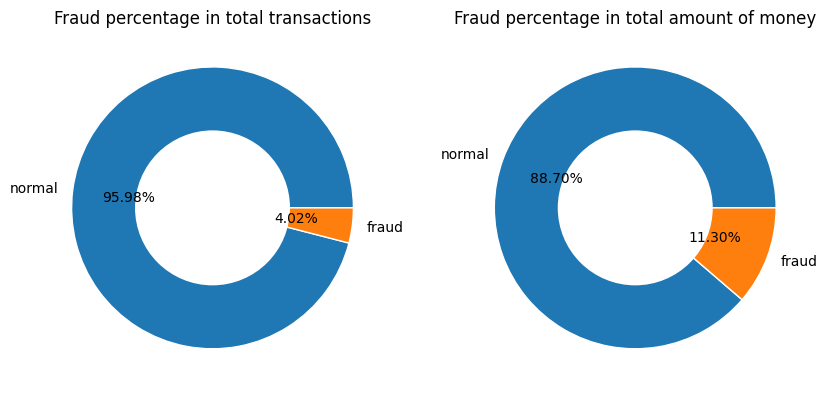

In [ ]:
labels = df_based_rules.flagged_label
volume = df_based_rules.transactions
amount = df_based_rules.total_amount
explode = (0.1, 0.0) #2 volumes to be exploded 

# double pie charts
# Make figure and axes
fig, axs = plt.subplots(1,2, figsize=(10, 5))
#first pie
axs[0].pie(volume, labels=labels, autopct='%1.2f%%',\
            wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[0].set_title("Fraud percentage in total transactions")

# Adding Circle in first Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[0].add_artist(centre_circle)
#second pie
axs[1].pie(amount, labels=labels, autopct='%1.2f%%',\
             wedgeprops= {"edgecolor":"white", 'linewidth': 1, 'antialiased': True})
axs[1].set_title("Fraud percentage in total amount of money")

# Adding Circle in second Pie chart
centre_circle = plt.Circle((0, 0), 0.55, fc='white')
axs[1].add_artist(centre_circle)

plt.show()

In [ ]:
aggregated_df = rules_fraud_based_df.groupby(['nameOrig', 'nameDest', 'label']).agg(
    TotalOrgDiff=('orgDiff', 'sum'),
    TotalDestDiff=('destDiff', 'sum')
).reset_index()
data4 =  aggregated_df[aggregated_df['TotalDestDiff'] >= 1000000].reset_index(drop=True)

In [ ]:
data4.head(10)

,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff
0,C1000005353,C292963054,0,-24996.00,3228390.11
1,C1000005749,C1247252665,0,0.00,3229333.12
2,C100002734,C776253559,0,0.00,1288884.49
3,C1000028246,C1902027015,0,0.00,1467941.17
4,C1000044288,C1105638219,0,0.00,1306702.73
5,C1000069949,C1116776735,0,121108.11,1526158.74
6,C1000077677,C1483097104,1,-175841.00,1627720.86
7,C1000084237,C55040366,1,-108404.00,3433978.54
8,C1000097327,C642584095,0,0.00,1003721.94
9,C1000104995,C1409969112,1,-101733.00,2084473.48


In [ ]:
df_top_diff_Org_Dest = data4.copy()
df_top_diff_Org_Dest['flagged_label'] = np.where(df_top_diff_Org_Dest['label']==1, 'fraud', 'normal')
df_top_diff_Org_Dest['name'] = df_top_diff_Org_Dest.nameOrig + df_top_diff_Org_Dest.nameDest
df_top_diff_Org_Dest.head()

,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff,flagged_label,name
0,C1000005353,C292963054,0,-24996.0,3228390.11,normal,C1000005353C292963054
1,C1000005749,C1247252665,0,0.0,3229333.12,normal,C1000005749C1247252665
2,C100002734,C776253559,0,0.0,1288884.49,normal,C100002734C776253559
3,C1000028246,C1902027015,0,0.0,1467941.17,normal,C1000028246C1902027015
4,C1000044288,C1105638219,0,0.0,1306702.73,normal,C1000044288C1105638219


In [ ]:
def number_format_M(number):
    #function format number to Million
    units = 'B'
    k = 1000000.0
    return '%.3f' % (number / k)

In [ ]:
#format to Million column TotalOrgDiff, TotalDestDiff
df_top_diff_Org_Dest['TotalOrgDiff'] = \
            df_top_diff_Org_Dest['TotalOrgDiff'].apply(lambda x: number_format_M(x))
df_top_diff_Org_Dest['TotalDestDiff'] = \
            df_top_diff_Org_Dest['TotalDestDiff'].apply(lambda x: number_format_M(x))

df_top_diff_Org_Dest.head()

,nameOrig,nameDest,label,TotalOrgDiff,TotalDestDiff,flagged_label,name
0,C1000005353,C292963054,0,-0.025,3.228,normal,C1000005353C292963054
1,C1000005749,C1247252665,0,0.000,3.229,normal,C1000005749C1247252665
2,C100002734,C776253559,0,0.000,1.289,normal,C100002734C776253559
3,C1000028246,C1902027015,0,0.000,1.468,normal,C1000028246C1902027015
4,C1000044288,C1105638219,0,0.000,1.307,normal,C1000044288C1105638219


## What type of transactions are associated with fraud?

In [ ]:
data5 = rules_fraud_based_df.groupby(['type', 'label']).size().reset_index(name='transactions')

In [ ]:
df_fraud_in_type_trans = data5.copy()
df_fraud_in_type_trans = df_fraud_in_type_trans.rename(columns={'transactions':'sum_trans'})
df_fraud_in_type_trans['label'] = np.where(df_fraud_in_type_trans['label'] == 1, 'fraud', 'regular')
df_fraud_in_type_trans

,type,label,sum_trans
0,CASH_IN,regular,1399219
1,CASH_IN,fraud,65
2,CASH_OUT,regular,2052790
3,CASH_OUT,fraud,184710
4,DEBIT,regular,41401
5,DEBIT,fraud,31
6,PAYMENT,regular,2150909
7,PAYMENT,fraud,586
8,TRANSFER,regular,462661
9,TRANSFER,fraud,70248


In [ ]:
outer = df_fraud_in_type_trans.groupby('type').sum(numeric_only=True)
display(outer)
inner = df_fraud_in_type_trans.groupby(['type', 'label']).sum()
display(inner)
inner_labels = inner.index.get_level_values(1)
display(inner_labels)

,sum_trans
type,
CASH_IN,1399284
CASH_OUT,2237500
DEBIT,41432
PAYMENT,2151495
TRANSFER,532909


sum_trans
type     label             
CASH_IN  fraud           65
         regular    1399219
CASH_OUT fraud       184710
         regular    2052790
DEBIT    fraud           31
         regular      41401
PAYMENT  fraud          586
         regular    2150909
TRANSFER fraud        70248
         regular     462661

Index(['fraud', 'regular', 'fraud', 'regular', 'fraud', 'regular', 'fraud',
       'regular', 'fraud', 'regular'],
      dtype='object', name='label')

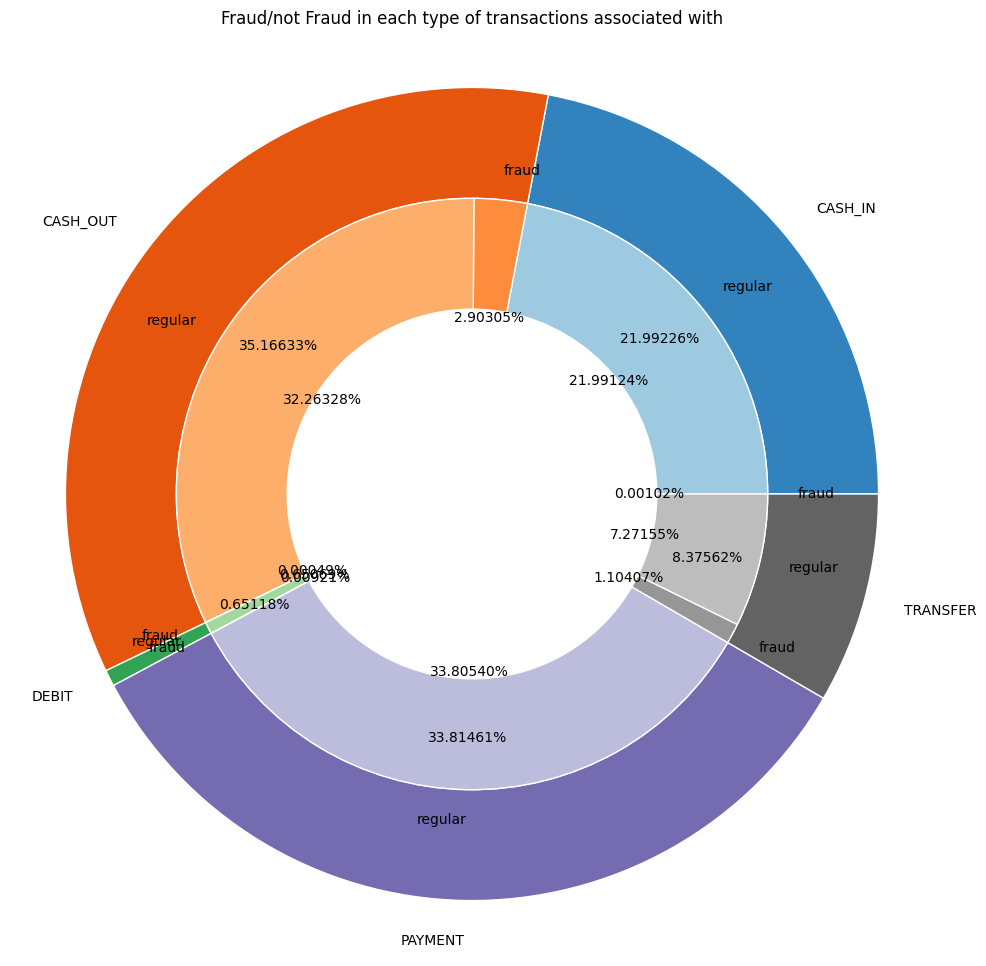

In [ ]:
fig, ax = plt.subplots(figsize=(24,12))
size = 0.3
#cmap color
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap([1,2, 5,6, 9,10, 13,14, 17,18])
#outter pie
ax.pie(outer.values.flatten(), 
       radius=1.1, labels=outer.index, autopct='%1.5f%%', colors=outer_colors,
      wedgeprops=dict(width=size, edgecolor='w'))
#inner pie
ax.pie(inner.values.flatten(), radius=1.1-size, labels=inner_labels, colors=inner_colors, 
       autopct='%1.5f%%', wedgeprops=dict(width=size, edgecolor='w'))
#tittle
ax.set(title="Fraud/not Fraud in each type of transactions associated with")

plt.show()

## Rules vs. ML model
Instead of creating specific rules that will change over time, we can be more precise and more productive by using ML model

### Create training and testing datasets
Using randomplit to create our training and testing datsets, to build and vilidate our generalized ML model

In [ ]:
!pip install pyspark -q

ERROR: Exception:
Traceback (most recent call last):
  File "E:\AI Projects\SIEM_Analysis\virtualenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "E:\AI Projects\SIEM_Analysis\virtualenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "E:\AI Projects\SIEM_Analysis\virtualenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "E:\AI Projects\SIEM_Analysis\virtualenv\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Ibtasam Ahmad\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
  File "C:\Users\Ibtasam Ahmad\AppData\Local\Programs\Python\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File 

In [ ]:
#import pyspark
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, SQLContext
print(f"PySpark Version : {pyspark.__version__}")

In [ ]:
#Create a spark Context class, with custom config
conf = SparkConf()
conf.set('spark.default.parallelism', 700)
conf.set('spark.sql.shuffle.partitions', 700)
conf.set('spark.driver.memory', '30g')
conf.set('spark.driver.cores', 8)
conf.set('spark.executor.cores', 8)
conf.set('spark.executor.memory', '30g')
sc = SparkContext.getOrCreate(conf)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/03/07 19:58:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
## Create spark session
spark = SparkSession.builder.master('local[*]').\
                config('spark.sql.debug.maxToStringFields', '100').\
                appName("Python Spark Dataframes Financial Fruad").getOrCreate()

In [ ]:
df = spark.createDataFrame(df)

In [ ]:
#initially split our dataset
(train, test) = df.randomSplit([0.8, 0.2], seed=12345)

#Cache the training and test datasets
train.cache()
test.cache()

#print out dataset counts
print("Total rows: %s, Training rows: %s, Test rows: %s" %\
      (df.count(), train.count(), test.count()))

Total rows: 6362620, Training rows: 5090123, Test rows: 1272497


## Create ML pipeline
When creating an ML model, there are typically a set of repeated steps(e.g. StringIndexer, VectorAssembler, etc.). By creating a ML pipeline, we can reuse this pipeline( and all of its steps) to retrain on a new and /or updated dataset.

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier

#Encodes a string column of labels to a column of label indices
indexer = StringIndexer(inputCol="type", outputCol="typeIndexed")

#VectorAssembler is a transformer that combines
#a given list of columns into a single vector column
va = VectorAssembler(inputCols=["typeIndexed", "amount", "oldbalanceOrg", "newbalanceOrig",
                               "oldbalanceDest", "newbalanceDest", "orgDiff", "destDiff"], outputCol="features")

#Using the DecisionTree classifier model
dt = DecisionTreeClassifier(labelCol='isFraud', featuresCol='features', seed=54321, maxDepth=5)

# Create our pipeline stages
pipeline = Pipeline(stages=[indexer, va, dt])

In [ ]:
#view the Decision Tree model
dt_model = pipeline.fit(train)

In [ ]:
print(dt_model.stages[-1].toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_1a8f49bc7b22, depth=5, numNodes=33, numClasses=2, numFeatures=8
  If (feature 6 <= -106921.0)
   If (feature 5 <= 39.26)
    If (feature 0 in {0.0,1.0})
     Predict: 0.0
    Else (feature 0 not in {0.0,1.0})
     If (feature 4 <= 64.5)
      Predict: 1.0
     Else (feature 4 > 64.5)
      Predict: 0.0
   Else (feature 5 > 39.26)
    If (feature 2 <= 1987293.3050000002)
     If (feature 2 <= 747795.265)
      Predict: 0.0
     Else (feature 2 > 747795.265)
      If (feature 3 <= 7.33)
       Predict: 1.0
      Else (feature 3 > 7.33)
       Predict: 0.0
    Else (feature 2 > 1987293.3050000002)
     If (feature 3 <= 7.33)
      If (feature 0 in {3.0})
       Predict: 0.0
      Else (feature 0 not in {3.0})
       Predict: 1.0
     Else (feature 3 > 7.33)
      Predict: 0.0
  Else (feature 6 > -106921.0)
   If (feature 6 <= -33805.65)
    If (feature 5 <= 39.26)
     If (feature 0 in {0.0,1.0,4.0})
      Predict: 0.0
     Else 

In [ ]:
#extract features input and target variable
features_input = ["typeIndexed", "amount","oldbalanceOrg", "newbalanceOrig","oldbalanceDest","newbalanceDest", "orgDiff", "destDiff"]
target = "isFraud"

#extract decision tree from our model
dt_extracted = dt_model.stages[2]

#recompute the dataset on which the model was trained, with StringIndexer encoding only
dataset = Pipeline(stages=[indexer]).fit(train).transform(train).toPandas()[features_input+[target]]

In [ ]:
!pip install dtreeviz -q

In [ ]:
#import viz library
import dtreeviz
viz_model = dtreeviz.model(dt_extracted,
                          X_train=dataset[features_input],
                          y_train=dataset[target],
                          feature_names=features_input,
                          target_name=target, class_names=['0', '1'])

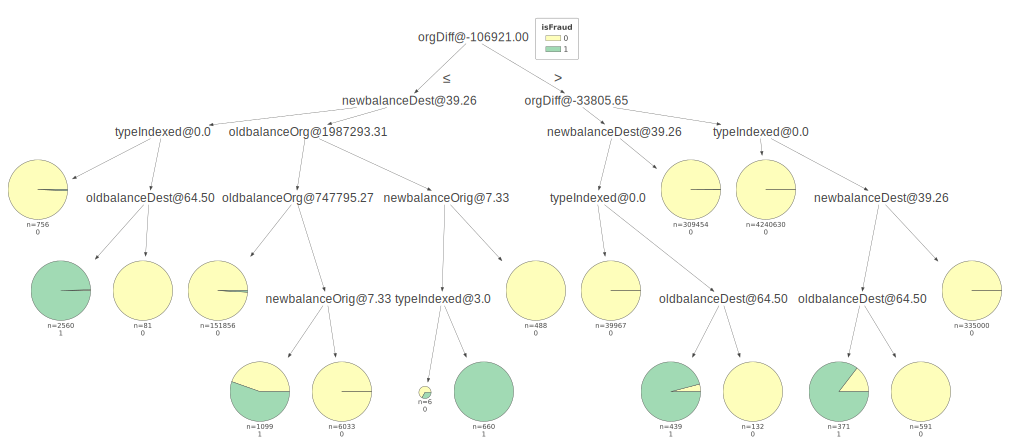

In [ ]:
#take long to viz large scale data
viz_model.view(fancy=False)

## Use BinaryClassificationEvaluator
Determine the accuracy of the model by reviewing the areaUnderPR and areaUnderROC

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

#evaluate the model
evaluatorPR = BinaryClassificationEvaluator(labelCol="isFraud",
                                            rawPredictionCol='prediction',
                                            metricName='areaUnderPR')
evaluatorAUC = BinaryClassificationEvaluator(labelCol="isFraud",
                                             rawPredictionCol="prediction",
                                             metricName="areaUnderROC")

### Setup CrossValidation
To potentially improve our model, we will use CrossValidator in conjunction with the ParamGriBuilder to automate trying out different parameters.

NOTE: We are using evaluatorPR as our evaluator as the Precision-Recall curve is often better for an imbalanced distribution.

In [ ]:
##40 minutes running time sections
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#Build the grid of different parameters
paramGird = ParamGridBuilder().addGrid(dt.maxDepth, [5, 10, 15]).addGrid(dt.maxBins, [10, 20, 30]).build()

#Build out the cross validation
crossval = CrossValidator(estimator=dt,
                         estimatorParamMaps= paramGird,
                         evaluator=evaluatorPR,
                         numFolds=3)

pipelineCV = Pipeline(stages=[indexer, va, crossval])

#Train the model using the pipeline, params grid, and preceding BinaryClassificationEvaluator
cvModel_u = pipelineCV.fit(train)

### Review the results
review the areaUnderPR (Area Under Precision Recall curve) and areaUnderROC(Area Under Receiver Operating Characteristic) or AUC (Area Under Curve) metrics.

In [ ]:
# Build the best model (training and test datasets)
train_pred = cvModel_u.transform(train)
test_pred = cvModel_u.transform(test)

#Evaluate the model on training datasets
pr_train = evaluatorPR.evaluate(train_pred)
auc_train = evaluatorAUC.evaluate(train_pred)

#Evaluate the model on test datasets
pr_test = evaluatorPR.evaluate(test_pred)
auc_test = evaluatorAUC.evaluate(test_pred)

#show the results
print("PR train:", pr_train)
print("AUC train:", auc_train)
print("PR test:", pr_test)
print("AUC test:", auc_test)
###

PR train: 0.8518187645146837
AUC train: 0.8620186484487274
PR test: 0.8375542397163444
AUC test: 0.8539166965541705


### Conclusion

The code performs comprehensive data analysis and visualization on a financial fraud dataset, focusing on the following key points:

1. **Data Preprocessing and Feature Engineering:**
   - The dataset is loaded and relevant columns are selected.
   - New features `orgDiff` and `destDiff` are created to capture balance differences.

2. **Visualization of Transaction Types:**
   - The distribution of transaction types is visualized using pie and bar charts.
   - The total amount of money involved in each transaction type is calculated and visualized.

3. **Analysis of Fraud Transactions:**
   - A set of rules is defined to identify potential fraud cases based on specific conditions.
   - The proportion of transactions flagged as fraud is calculated and visualized.

4. **Detailed Analysis of Specific Accounts:**
   - Accounts receiving large amounts of money are analyzed.
   - The total number of transactions and total amount of money for each destination account are calculated.

5. **Visualization of Fraud by Transaction Type:**
   - The relationship between transaction types and fraud is visualized using nested pie charts.

6. **Machine Learning Model for Fraud Detection:**
   - A PySpark ML pipeline is created to train a decision tree classifier.
   - The model is trained and evaluated using cross-validation and metrics like Area Under Precision-Recall Curve and Area Under ROC Curve.
   - Decision tree visualization is performed using `dtreeviz`.

The code provides a comprehensive analysis of financial transactions, identifies potential fraud using rule-based and machine learning approaches, and visualizes the results effectively.

## In-Depth Review of Financial Fraud Detection

### Introduction

This analysis dives into the process of detecting fraudulent transactions using a combination of data manipulation, visualization, and machine learning techniques. By blending exploratory data analysis (EDA) with machine learning methods, we aim to uncover fraudulent activities within a financial dataset. Here's a detailed breakdown of the steps taken, the key insights gathered, and how effective our approach has been in identifying fraud.

### Data Preparation and Initial Exploration

1. **Loading and Reviewing Data:**
   - We start by importing essential libraries such as `pandas`, `numpy`, `matplotlib`, and `pyspark`.
   - The dataset, stored in a CSV file named `Data.csv`, is loaded into a pandas DataFrame. This file holds transactional data related to financial operations.
   - To ensure the integrity of the original data, a copy of the DataFrame (`fin_fraud_copy`) is created.

2. **Selecting Important Columns:**
   - The dataset is trimmed to focus on key columns: `step`, `type`, `amount`, `nameOrig`, `oldbalanceOrg`, `newbalanceOrig`, `nameDest`, `oldbalanceDest`, `newbalanceDest`, and `isFraud`. These columns provide a snapshot of the transaction details and the target variable indicating fraud.

3. **Creating New Features:**
   - Two new features are calculated to assist in fraud detection:
     - `orgDiff`: Represents the difference between the old and new balance of the origin account.
     - `destDiff`: Represents the difference between the old and new balance of the destination account.
   - These features help in detecting anomalies by showing how account balances change after transactions.

### Exploratory Data Analysis (EDA)

1. **Distribution of Transaction Types:**
   - Transactions are categorized by type, and the size of each category is computed.
   - A pie chart is used to illustrate the distribution of transaction types. This visualization helps to identify the most common types of transactions.

2. **Analysis of Transaction Amounts:**
   - The total amount of money transacted is aggregated by type and converted to billions for clarity.
   - A horizontal bar chart displays the total transaction amount for each type, highlighting the transaction types with the largest monetary values.

3. **Analysis of Money Received:**
   - Aggregates the total amount received by each destination account, converted to millions for better readability.
   - The results are sorted to show which destination accounts handle the highest volumes of money.

### Fraud Detection Using Rules

1. **Applying Fraud Detection Rules:**
   - Several rules are implemented to detect potential fraud:
     - Transactions where the origin account’s old balance is ≤ 56,900 and the destination account’s new balance is ≤ 105.
     - Transactions where the origin account’s old balance is > 56,900 and the new balance of the origin account is ≤ 12.
     - Transactions where the origin account’s old balance is > 56,900 and the transaction amount exceeds 1,160,000.
   - Transactions are classified as fraudulent (1) or normal (0) based on these criteria.

2. **Fraud Statistics:**
   - The number and percentage of transactions flagged as fraud are computed and displayed.
   - This provides a snapshot of how many transactions were identified as fraudulent according to the defined rules.

3. **Fraud Analysis Visualization:**
   - A pie chart is created to show the proportion of fraudulent versus non-fraudulent transactions.
   - Another pie chart depicts the proportion of money associated with fraudulent versus non-fraudulent transactions.

### Advanced Analysis and Visualization

1. **Significant Balance Differences:**
   - Total differences in balances for both originating and destination accounts are aggregated.
   - Accounts are filtered where the total difference in destination balances is ≥ 1,000,000.
   - This analysis helps identify accounts with substantial balance changes, which may indicate potential fraud.

2. **Fraud and Transaction Types:**
   - Transactions are grouped by type and fraud status.
   - A nested pie chart is created to show how different transaction types are related to fraudulent and non-fraudulent transactions.
   - This visualization helps identify transaction types that are more frequently associated with fraud.

### Machine Learning Model with PySpark

1. **Setting Up PySpark:**
   - PySpark is set up with custom configurations to enhance performance for large-scale data processing.
   - A Spark DataFrame is created from the pandas DataFrame, and the data is split into training and test datasets.

2. **Building the Machine Learning Pipeline:**
   - The pipeline includes:
     - **StringIndexer**: Converts categorical variables into numerical values.
     - **VectorAssembler**: Combines features into a single vector column.
     - **DecisionTreeClassifier**: A decision tree model used to classify transactions as fraudulent or not.

3. **Training and Visualizing the Model:**
   - The Decision Tree model is trained on the training dataset.
   - The tree is visualized using the `dtreeviz` library, providing insights into how the model makes its decisions.

4. **Evaluating the Model:**
   - The model is assessed using:
     - **Precision-Recall (PR) Curve**: Evaluates the trade-off between precision and recall.
     - **ROC-AUC Curve**: Measures the area under the Receiver Operating Characteristic curve.
   - Cross-validation is conducted with various parameter settings to identify the optimal model configuration.

5. **Results:**
   - Precision-Recall and ROC-AUC scores are presented for both training and test datasets.
   - These metrics offer insights into the model’s performance and its ability to generalize to new data.

### Conclusion

The analysis and modeling process provided a thorough examination of the financial transactions dataset. Key steps included:

- **Data Preparation:** Ensured the data was clean and relevant features were engineered.
- **Exploratory Data Analysis:** Offered visual insights into transaction types, amounts, and patterns associated with fraud.
- **Rule-Based Fraud Detection:** Applied specific rules to flag potential fraud and assessed the effectiveness of these rules.
- **Advanced Analysis:** Identified significant changes in balances and transaction types related to fraud.
- **Machine Learning:** Used PySpark to build and refine a robust fraud detection model, evaluating its performance for better accuracy.

Combining traditional data analysis with advanced machine learning techniques has allowed for a comprehensive understanding and detection of fraudulent transactions. The integration of rule-based methods with machine learning approaches demonstrates the potential for enhanced fraud detection capabilities.